## Comparing the harmonic structure of different biosignal modalities 

In [1]:
#import sys
#sys.path.append(os.path.join'C:\Users\Dell\GitHub\biotuner\biotuner')
import numpy as np
import biotuner
from biotuner.biotuner_utils import *
from biotuner.biotuner_functions import *
import matplotlib.pyplot as plt
from biotuner.biotuner2d import*
from biotuner.biotuner_object import *
import mne
from scipy import signal
import warnings
import neurokit2 as nk
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

pygame 2.0.2 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Comparing EEG with EMG

First, we load the EMG data and slice it windows of 3 seconds

In [294]:
path = 'C:/Users/Dell/GitHub/biotuner/examples/data_examples/EMG'
EMG_data = np.load(path+'/EMG_data.npy')
EMG_sf = 2048
EMG_data = slice_data(EMG_data, EMG_sf, window=3)

Then, we load the EEG data

In [295]:
path = 'C:/Users/Dell/GitHub/biotuner/examples/data_examples/'
EEG_data = np.load(path+'parei_data_1000ts.npy')
EEG_sf = 1000
EEG_data.shape

(500, 9501)

and we downsample the data with the highest sampling frequency (MEG) to match EEG and MEG sampling frequencies

In [296]:
EMG_data = resample_2d(EMG_data, EMG_sf, EEG_sf)

We equate the number of time series for the EEG and MEG data, and crop each EEG time series to equate the 3 second window that we have determined

In [297]:
EEG_data, EMG_data = equate_dimensions(EEG_data, EMG_data)
data_all = [EEG_data, EMG_data]
conditions = ['EEG', 'EMG']

EEG
EMG
EEMD  peaks freqs  [13.8925, 38.619166666666665]


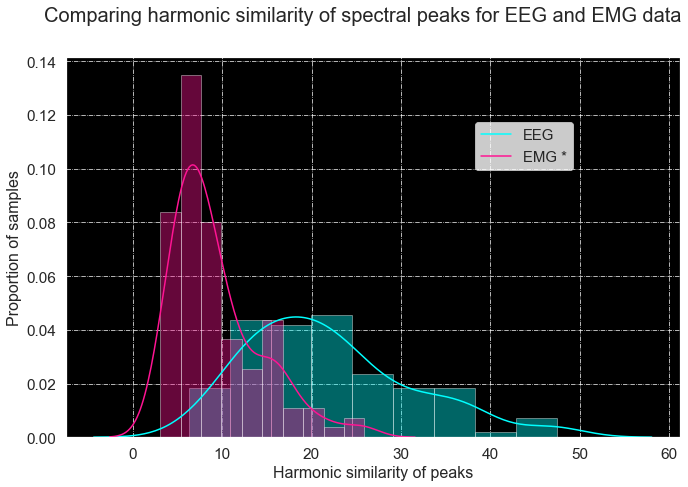

In [298]:
title = 'Comparing harmonic similarity of spectral peaks for EEG and EMG data'
graph_conditions(data_all, sf = 1000, conditions=conditions, metric_to_graph='harmsim', 
                 peaks_function='EEMD', precision=0.5,
                display=True, save=False, low_cut = 1, high_cut = 200, title=title)

EEG
EMG
fixed  peaks freqs  [12.919166666666664, 16.89]


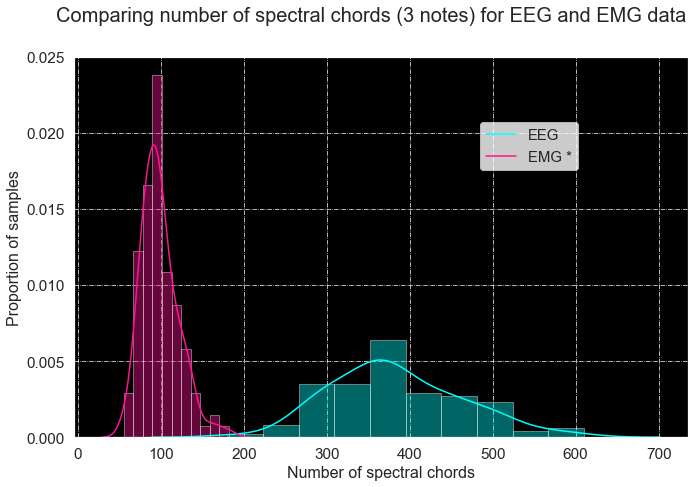

In [299]:
data_all = [EEG_data, EMG_data]
conditions = ['EEG', 'EMG']
title = 'Comparing number of spectral chords (3 notes) for EEG and EMG data'
graph_conditions(data_all, sf = 1000, conditions=conditions, metric_to_graph='n_spectro_chords', 
                 peaks_function='fixed', precision=0.5, min_notes=3, cons_limit=0.1,
                display=True, save=False, low_cut = 1, high_cut = 200, title=title)

In [ ]:
data_all = [EEG_data[0:50], EMG_data[0:50]]

conditions = ['EEG', 'EMG']
graph_conditions(data_all, sf = 1000, conditions=conditions, metric_to_graph='n_IF_chords', 
                 peaks_function='HH1D_max', precision=0.5, min_notes=3, cons_limit=0.1,
                display=True, save=False, low_cut = 1, high_cut = 200)

EEG
EMG


## Comparing EEG with iEEG

Load the EEG data

In [300]:
path = 'data_examples/'
EEG_data = np.load(path+'parei_data_1000ts.npy')
EEG_sf = 1000
EEG_data.shape

(500, 9501)

Load the iEEG data and slice it

In [301]:
path = 'data_examples/'
data = mne.io.read_raw_edf(path + '/ieeg_amyg.edf', preload = True)
iEEG_data = data.load_data()
iEEG_data = iEEG_data.get_data()
iEEG_sf = 2000
iEEG_data = slice_data(iEEG_data, iEEG_sf, window=5)
iEEG_data.shape

Extracting EDF parameters from C:\Users\Dell\GitHub\biotuner\examples\data_examples\ieeg_amyg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1043999  =      0.000 ...   522.000 secs...


(416, 10000)

Resample the data with highest sampling frequency and equate size of datasets

In [302]:
iEEG_data = resample_2d(iEEG_data, 2000, 1000)
print(iEEG_data.shape)
EEG_data, iEEG_data = equate_dimensions(EEG_data, iEEG_data)
data_all = [EEG_data, iEEG_data]
conditions = ['EEG', 'iEEG']

(416, 5000)


Compare **n_spectro_chords** between distributions (by default it uses the **EEMD** function)

EEG
iEEG
fixed  peaks freqs  [12.997596153846153, 12.805048076923075]


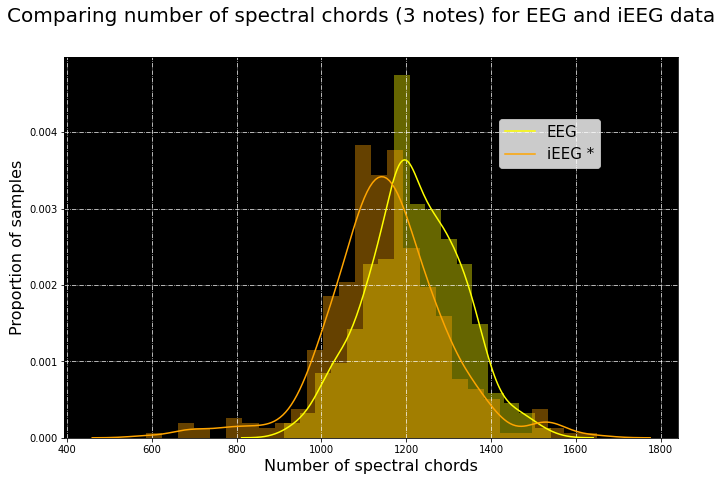

In [13]:
colors = ['yellow', 'orange']
title = 'Comparing number of spectral chords (3 notes) for EEG and iEEG data'
graph_conditions(data_all, sf = 1000, conditions=conditions, metric_to_graph='n_spectro_chords', peaks_function='fixed', precision=0.5,
                display=True, save=False, low_cut = 1, high_cut = 250, min_notes = 2, cons_limit=0.1, colors=colors, title=title)

Compare **harmonic similarity** between distributions using the **EEMD** function

EEG
iEEG
EEMD  peaks freqs  [15.661778846153844, 17.649830508474576]


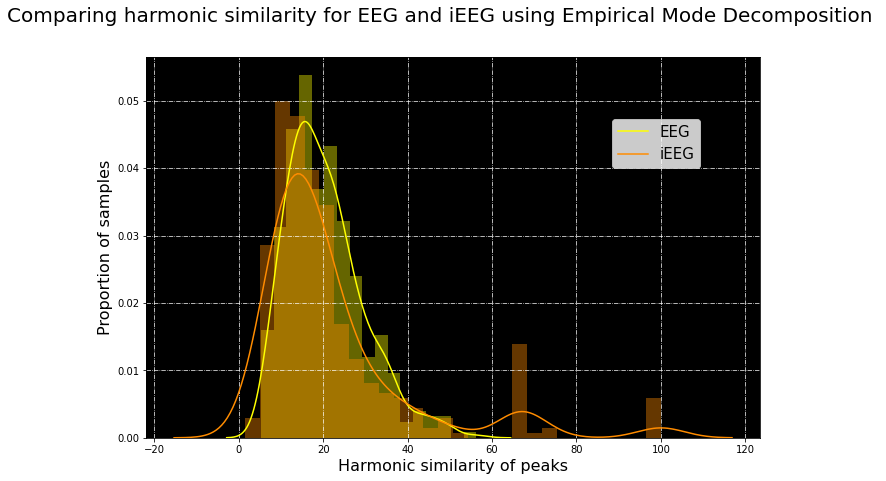

In [31]:
data_all = [EEG_data, iEEG_data]
conditions = ['EEG', 'iEEG']
colors = ['yellow', 'darkorange']
title = 'Comparing harmonic similarity for EEG and iEEG using Empirical Mode Decomposition '
graph_conditions(data_all, sf = 1000, conditions=conditions, metric_to_graph='harmsim', peaks_function='EEMD', precision=0.5,
                display=True, save=False, low_cut = 1, high_cut = 250, min_notes = 2, cons_limit=0.1, colors=colors, title=title)

We compare the distribution of averaged peaks values using EEMD function for EEG and iEEG signals and show a significant difference. This effect, combined with the non-significant effect of when comparing harmonic similarity with EEMD function points to the fact that the levels of consonance are not directly dependant on the averaged frequency values

EEG
iEEG
EEMD  peaks freqs  [15.661778846153844, 17.649830508474576]


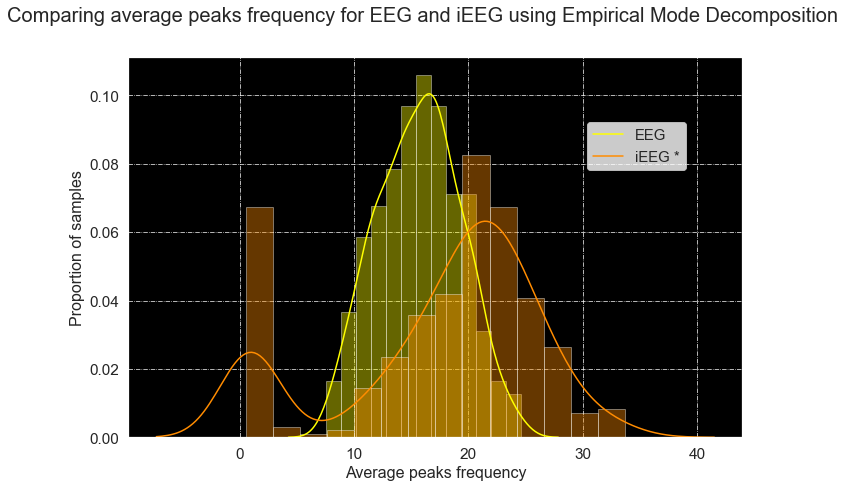

In [304]:
data_all = [EEG_data, iEEG_data]
conditions = ['EEG', 'iEEG']
colors = ['yellow', 'darkorange']
title = 'Comparing average peaks frequency for EEG and iEEG using Empirical Mode Decomposition '
graph_conditions(data_all, sf = 1000, conditions=conditions, metric_to_graph='peaks', peaks_function='EEMD', precision=0.5,
                display=True, save=False, low_cut = 1, high_cut = 250, min_notes = 2, cons_limit=0.1, title=title, colors=colors)

## Comparing ECG with EEG

ECG data was obtained here: https://physionet.org/content/adfecgdb/1.0.0/

These abdominal electrocardiogram data were recorded during labor. 

First we will load the EEG and ECG data and equate their sampling frequency and sizes

In [308]:
#ECG
path = 'data_examples/ECG/'
data = mne.io.read_raw_edf(path + '/r01.edf', preload = True)
ECG_data = data.load_data()
ECG_data = ECG_data.get_data()
ECG_sf = 1000
ECG_data = slice_data(ECG_data[0:4], ECG_sf, window=5)
ECG_data.shape
#EEG
path = 'data_examples/'
EEG_data = np.load(path+'parei_data_1000ts.npy')
EEG_sf = 1000
EEG_data.shape

EEG_data, ECG_data = equate_dimensions(EEG_data, ECG_data)
data_EEG_ECG = [EEG_data, ECG_data]
conditions = ['EEG', 'ECG']

Extracting EDF parameters from C:\Users\Dell\GitHub\biotuner\examples\data_examples\ECG\r01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...   299.999 secs...


We see that the **harmonic similarity** metric using the **EEMD** method doesn't allow to distinguish between the two types of signals

EEG
ECG
EEMD  peaks freqs  [15.472083333333334, 12.827500000000002]


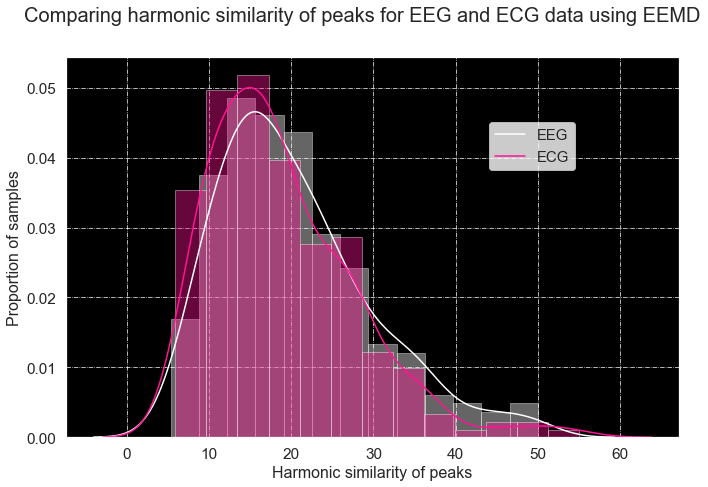

In [312]:
data_EEG_ECG = [EEG_data, ECG_data]
colors = ['white', 'deeppink']
title = 'Comparing harmonic similarity of peaks for EEG and ECG data using EEMD'
graph_conditions(data_EEG_ECG, sf = 1000, conditions=conditions, metric_to_graph='harmsim', 
                 peaks_function='EEMD', precision=0.5, display=True, save=False, low_cut = 1, 
                 high_cut = 250, min_notes = 2, cons_limit=0.1, colors=colors, title=title)

However, the **n_spectro_chords** metric using the **EEMD** method allows to distinguish between the two types of signals

EEG
ECG
fixed  peaks freqs  [12.696875, 12.583680555555555]


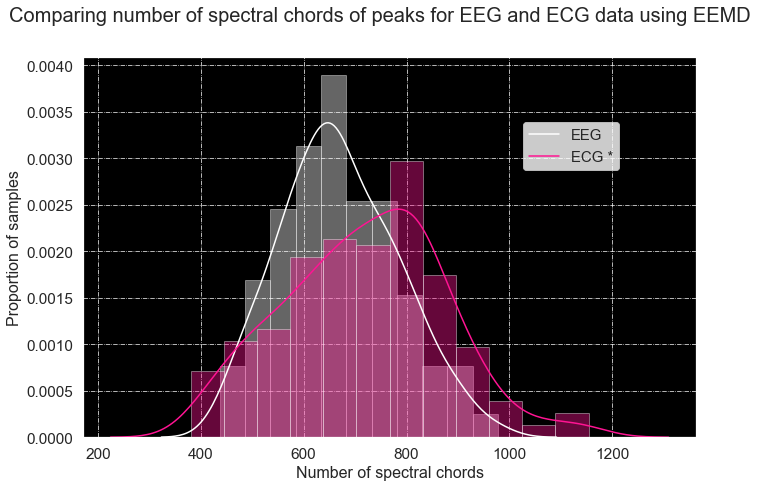

In [313]:
data_EEG_ECG = [EEG_data, ECG_data]
colors = ['white', 'deeppink']
title = 'Comparing number of spectral chords of peaks for EEG and ECG data using EEMD'
FREQ_BANDS = [[1, 2], [2, 4], [4, 8], [8, 16], [16, 32], [32, 64]]
graph_conditions(data_EEG_ECG, sf = 1000, conditions=conditions, metric_to_graph='n_spectro_chords', 
                 peaks_function='fixed', precision=0.5, display=True, save=False, low_cut = 1, 
                 high_cut = 250, min_notes = 3, cons_limit=0.1, FREQ_BANDS = FREQ_BANDS, 
                colors=colors, title=title)

We reproduce the result using the ECG from another participant

In [314]:
#ECG
path = 'data_examples/ECG/'
data_ = mne.io.read_raw_edf(path + '/r10.edf', preload = True)
ECG_data = data_.load_data()
ECG_data = ECG_data.get_data()
ECG_sf = 1000
ECG_data = slice_data(ECG_data[0:4], ECG_sf, window=5)
ECG_data.shape
#EEG
path = 'data_examples/'
EEG_data = np.load(path+'parei_data_1000ts.npy')
EEG_sf = 1000
EEG_data.shape

EEG_data, ECG_data = equate_dimensions(EEG_data, ECG_data)
data_EEG_ECG = [EEG_data, ECG_data]
conditions = ['EEG', 'ECG']

Extracting EDF parameters from C:\Users\Dell\GitHub\biotuner\examples\data_examples\ECG\r10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...   299.999 secs...


EEG
ECG
fixed  peaks freqs  [12.696875, 12.676388888888887]


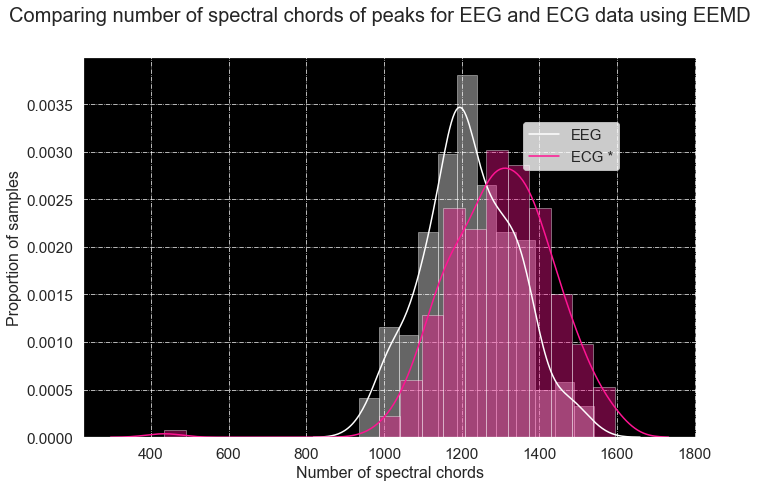

In [315]:
data_EEG_ECG = [EEG_data, ECG_data]
colors = ['white', 'deeppink']
title = 'Comparing number of spectral chords of peaks for EEG and ECG data using EEMD'
FREQ_BANDS = [[1, 2], [2, 4], [4, 8], [8, 16], [16, 32], [32, 64]]
graph_conditions(data_EEG_ECG, sf = 1000, conditions=conditions, metric_to_graph='n_spectro_chords', 
                 peaks_function='fixed', precision=0.5, display=True, save=False, low_cut = 1, 
                 high_cut = 250, min_notes = 2, cons_limit=0.1, FREQ_BANDS = FREQ_BANDS,
                colors=colors, title=title)

## Comparing ECG signal with simulated ECG signal

We generate an ECG dataset that matches the dimensions and properties of a real ECG dataset 

In [307]:
print(ECG_data.shape)
ECG_sim = generate_ecg_dataset(duration=5, sf=1000, n_trials=240,noise_amp=0.01, artifacts_amp=0.01)
ECG_sim_noise = generate_ecg_dataset(duration=5, sf=1000, n_trials=240,noise_amp=0.4, artifacts_amp=0.4)
sim_noise = generate_ecg_dataset(duration=5, sf=1000, n_trials=240,noise_amp=0.4, artifacts_amp=0.4, mode='noise')
print(ECG_sim.shape)
print(ECG_sim_noise.shape)
data_sim = [ECG_data, ECG_sim, ECG_sim_noise, sim_noise]
conditions = ['ECG', 'Sim clean', 'Sim noisy', 'Noise']

(240, 5000)
(240, 5000)
(240, 5000)


When using fixed frequency bands spanning one octave each, the simulated signal has higher harmonic similarity between peaks

ECG
Sim clean
Sim noisy
harmonic_peaks  peaks freqs  [19.919346549192365, 9.080555555555556, 16.50743243243243]


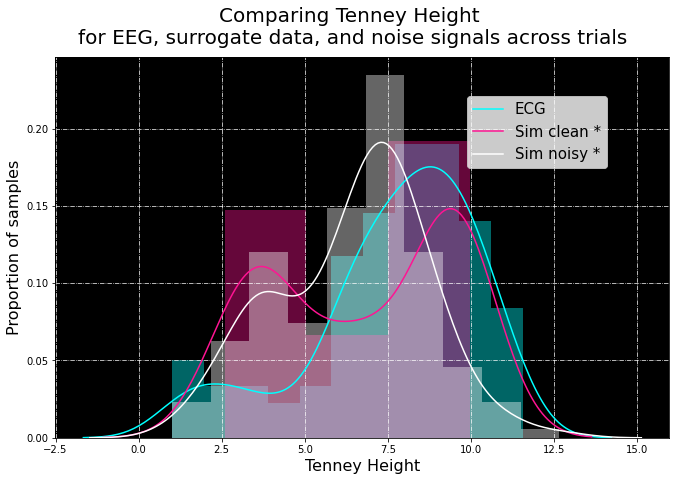

In [15]:
data_sim = [ECG_data, ECG_sim, ECG_sim_noise]
conditions = ['ECG', 'Sim clean', 'Sim noisy']
FREQ_BANDS = [[1, 2], [2, 4], [4, 8], [8, 16], [16, 32], [32, 64]]
graph_conditions(data_sim, sf = 1000, conditions=conditions, metric_to_graph='tenney', 
                 peaks_function='harmonic_peaks', precision=0.5, display=True, save=False, low_cut = 1, 
                 high_cut = 250, min_notes = 2, cons_limit=0.1, FREQ_BANDS = FREQ_BANDS)

ECG
Sim clean
Sim noisy
EEMD  peaks freqs  [12.827500000000002, 1.7113541666666667, 3.185416666666667]


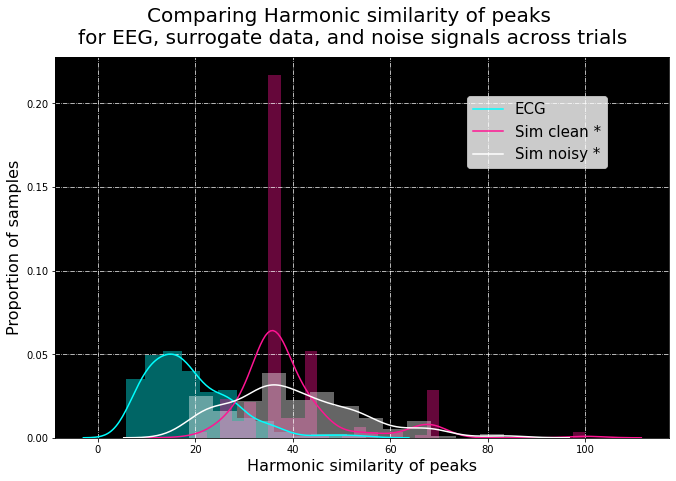

In [17]:
data_sim = [ECG_data, ECG_sim, ECG_sim_noise]
conditions = ['ECG', 'Sim clean', 'Sim noisy']
FREQ_BANDS = [[1, 2], [2, 4], [4, 8], [8, 16], [16, 32], [32, 64]]
graph_conditions(data_sim, sf = 1000, conditions=conditions, metric_to_graph='harmsim', 
                 peaks_function='EEMD', precision=0.5, display=True, save=False, low_cut = 1, 
                 high_cut = 250, min_notes = 2, cons_limit=0.1, FREQ_BANDS = FREQ_BANDS)

### We will compare simulated signal ('sim_clean') with simulated signal+noise ('sim_noisy') with the noise component alone ('noise')

This will allow to if the signal+noise differs from the noise alone
We can see that the simulated signal has less variable consonance values as compared to signal+noise.
We also can see that the signal+noise differs from the noise component alone, which points towards the fact that the consonance metrics grasp information from the signal itself.

Sim noisy
Sim clean
Noise
EEMD  peaks freqs  [3.185416666666667, 1.7113541666666667, 3.450416666666667]


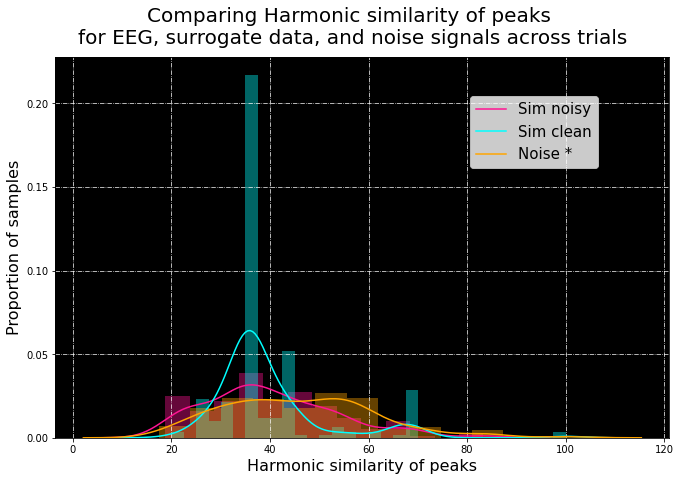

In [18]:
data_sim = [ECG_sim_noise, ECG_sim, sim_noise]
conditions = ['Sim noisy', 'Sim clean', 'Noise']
colors = ['deeppink', 'cyan', 'orange', 'white']
graph_conditions(data_sim, sf = 1000, conditions=conditions, metric_to_graph='harmsim', 
                 peaks_function='EEMD', precision=0.5, display=True, save=False, low_cut = 1, 
                 high_cut = 250, min_notes = 2, cons_limit=0.1, colors=colors)

Sim noisy
Sim clean
Noise
fixed  peaks freqs  [12.045333333333334, 11.448666666666664, 12.811333333333334]


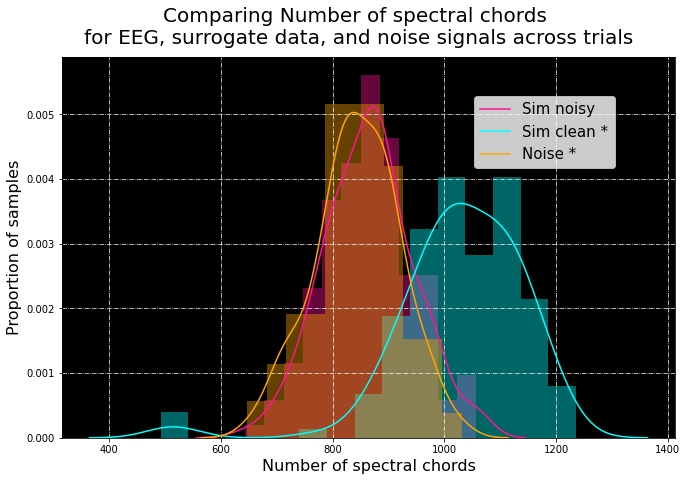

In [5]:
title = 'Comparing number of spectral chords (4 notes) for simulated ECG data and noise component'
data_sim = [ECG_sim_noise[0:150], ECG_sim[0:150], sim_noise[0:150]]
conditions = ['Sim noisy', 'Sim clean', 'Noise']
colors = ['deeppink', 'cyan', 'orange', 'white']
graph_conditions(data_sim, sf = 1000, conditions=conditions, metric_to_graph='n_spectro_chords', 
                 peaks_function='fixed', precision=0.5, display=True, save=False, low_cut = 1, 
                 high_cut = 250, min_notes = 4, cons_limit=0.1, colors=colors, title=title)